In [ ]:
# ANALYSING RELATIONSHIP BETWEEN DATE AND MIN TEMP

# https://docs.microsoft.com/en-us/learn/modules/introduction-to-classical-machine-learning/3-exercise-separate-data-test-model

In [2]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv', parse_dates=['date'])


In [4]:
data

,date,amount_of_precipitation,max_temperature,min_temperature,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [5]:
# Keep only January temperatures
data = data[[d.month == 1 for d in data.date]].copy()

data

,date,amount_of_precipitation,max_temperature,min_temperature,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25229,2017-01-27,0.00,54,37,False
25230,2017-01-28,0.00,52,37,False
25231,2017-01-29,0.03,48,37,True
25232,2017-01-30,0.02,45,40,True


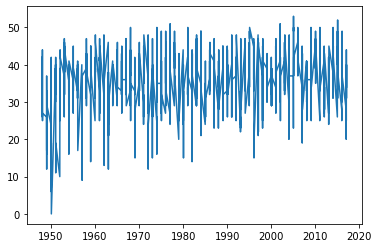

In [9]:
import matplotlib.pyplot as plt
plt.plot(data["date"],data["min_temperature"])
print()


In [10]:
import numpy as np

# This block of code scales and offsets the data slightly, which helps the training process
# You do not need to understand this code. we'll cover these concepts in later learning material

# Offset date into number of years since 1982
data["years_since_1982"] = [(d.year + d.timetuple().tm_yday / 365.25) - 1982 for d in data.date]

# Scale and offset temperature so that it has a smaller range of values
data["normalised_temperature"] = (data["min_temperature"] - np.mean(data["min_temperature"])) / np.std(data["min_temperature"])



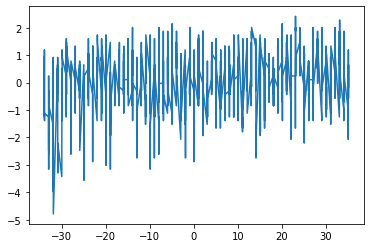

In [12]:
# Graph
plt.plot(data["years_since_1982"], data["normalised_temperature"])
print()
         

In [ ]:
# THE MODEL 
# This is a clever way of writing python functions using object oriented programming language

In [34]:
class MyModel:

    def __init__(self):
        '''
        Creates a new MyModel
        '''
        # Straight lines described by two parameters:
        # The slop is the angle of the line
        self.slope = 0
        # The intercept moves the line up or down
        self.intercept = 0

    def predict(self, date):
        '''
        Estimates the temperature from the date
        '''
        return date * self.slope + self.intercept

# Create our model ready to be trained
model = MyModel()

print("Model made!")

Model made!


In [36]:
print(f"Model parameters before training: {model.intercept}, {model.slope}")

Model parameters before training: 0, 0


In [38]:
# Look at how well the model does before training
print("Model visualised before training:")
# the graphic command doesnt work here
###graphing.scatter_2D(data, "years_since_1982", "normalised_temperature", trendline=model.predict) 

Model visualised before training:


# The objective (cost) function


In [ ]:
Our next step is to create an cost function (objective function).

The cost function will compares the estimated label i.e temperature(output) to temperatures seen in the historical 
data


In [ ]:
def cost_function(actual_temperatures, estimated_temperatures):
    '''
    Calculates the difference between actual and estimated temperatures
    Returns the difference, and also returns the squared difference (the cost)

    actual_temperatures: One or more temperatures recorded in the past
    estimated_temperatures: Corresponding temperature(s) estimated by the model
    '''

    # Calculate the difference between actual temperatures and those
    # estimated by the model
    difference = estimated_temperatures - actual_temperatures

    # Convert to a single number that tells us how well the model did
    # (smaller numbers are better)
    cost = sum(difference ** 2)

    return difference, cost

# to rund the function above, you need to pass parameters to it

# The optimizer

In [ ]:
# The The optimizer quess new values for the model(predict new value for the model)

In [ ]:
from m0b_optimizer import MyOptimizer

# Create an optimizer
optimizer = MyOptimizer()

# The Training loop

In [ ]:
def train_one_iteration(model_inputs, true_temperatures, last_cost:float):
    '''
    Runs a single iteration of training.


    model_inputs: One or more dates to provide the model (dates)
    true_temperatues: Corresponding temperatures known to occur on from those dates

    Returns:
        A boolean, as to whether training should continue
        The cost calculated (small numbers are better)
    '''

    # === USE THE MODEL ===
    # Estimate temperatures for all data that we have
    estimated_temperatures = model.predict(model_inputs)

    # === OBJECTIVE FUNCTION ===
    # Calculate how well the model is working
    # Smaller numbers are better 
    difference, cost = cost_function(true_temperatures, estimated_temperatures)

    # Decide whether to keep training
    # we'll stop if the training is no longer improving the model effectively
    if cost >= last_cost:
        # Abort training
        return False, cost
    else:
        # === OPTIMIZER ===
        # Calculate updates to parameters
        intercept_update, slope_update = optimizer.get_parameter_updates(model_inputs, cost, difference)

        # Change the model parameters
        model.slope += slope_update
        model.intercept += intercept_update

        return True, cost

print("Training method ready")

In [ ]:
import math

print(f"Model parameters before training:\t\t{model.intercept:.8f},\t{model.slope:.8f}")

continue_loop, cost = train_one_iteration(model_inputs = data["years_since_1982"],
                                                    true_temperatures = data["normalised_temperature"],
                                                    last_cost = math.inf)

print(f"Model parameters after 1 iteration of training:\t{model.intercept:.8f},\t{model.slope:.8f}")


# Wrapping all iterations in a loop

In [ ]:
# start the loop
print("Training beginning...")
last_cost = math.inf
i = 0
continue_loop = True
while continue_loop:

    # Run one iteration of training
    # This will tell us whether to stop training, and also what
    # the cost was for this iteration
    continue_loop, last_cost = train_one_iteration(model_inputs = data["years_since_1982"],
                                                    true_temperatures = data["normalised_temperature"],
                                                    last_cost = last_cost)
   
    # Print the status
    if i % 400 == 0:
        print("Iteration:", i)

    i += 1

    
print("Training complete!")
print(f"Model parameters after training:\t{model.intercept:.8f},\t{model.slope:.8f}")
graphing.scatter_2D(data, "years_since_1982", "normalised_temperature", trendline=model.predict)    

# OPTIMISE MODEL USING COST FUNCTION

In [41]:
import pandas as pd


data = pd.read_csv("https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv")



In [42]:
data


,date,amount_of_precipitation,max_temperature,min_temperature,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [43]:
from datetime import datetime

# Load a file containing our weather data
dataset = pandas.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv', 
                          parse_dates=['date'])


In [44]:
dataset

,date,amount_of_precipitation,max_temperature,min_temperature,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [46]:

# Convert the dates into numbers so we can use it in our models
# this inserts a new variable, year in the dta set
# We make a year column which can contain fractions. For example
# 1948.5 is half way through the year 1948
dataset["year"] = [(d.year + d.timetuple().tm_yday / 365.25) for d in dataset.date]


In [47]:
dataset

,date,amount_of_precipitation,max_temperature,min_temperature,rain,year
0,1948-01-01,0.47,51,42,True,1948.002738
1,1948-01-02,0.59,45,36,True,1948.005476
2,1948-01-03,0.42,45,35,True,1948.008214
3,1948-01-04,0.31,45,34,True,1948.010951
4,1948-01-05,0.17,45,32,True,1948.013689
...,...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False,2017.941821
25547,2017-12-11,0.00,49,29,False,2017.944559
25548,2017-12-12,0.00,46,32,False,2017.947296
25549,2017-12-13,0.00,48,34,False,2017.950034


In [50]:
# For the sake of this exercise, let's look at Feb 1st for the following years:
# we will use the specification below to slice the data set
desired_dates = [
    datetime(1950,2,1),
    datetime(1960,2,1),
    datetime(1970,2,1),
    datetime(1980,2,1),
    datetime(1990,2,1),
    datetime(2000,2,1),
    datetime(2010,2,1),
    datetime(2017,2,1),
]

dataset_subset = dataset[dataset.date.isin(desired_dates)].copy()

# Print the dataset
dataset_subset

,date,amount_of_precipitation,max_temperature,min_temperature,rain,year
762,1950-02-01,0.00,27,1,False,1950.087611
4414,1960-02-01,0.15,52,44,True,1960.087611
8067,1970-02-01,0.00,50,42,False,1970.087611
11719,1980-02-01,0.37,54,36,True,1980.087611
15372,1990-02-01,0.08,45,37,True,1990.087611
19024,2000-02-01,1.34,49,41,True,2000.087611
22677,2010-02-01,0.08,49,40,True,2010.087611
25234,2017-02-01,0.00,43,29,False,2017.087611


# Comparing two cost functions -
# calculating differnce between predicted value and expected value

In [ ]:

# SSD squares that difference, and sums the result;
# SAD converts differences into absolute differences, then sums them


In [52]:
import numpy

def sum_of_square_differences(estimate, actual):
    # Note that with numpy to square each value we use **
    return numpy.sum((estimate - actual)**2)

def sum_of_absolute_differences(estimate, actual):
    return numpy.sum(numpy.abs(estimate - actual))

In [56]:
actual_label = numpy.array([1, 3])
model_estimate = numpy.array([2, 2])


In [57]:
actual_label = numpy.array([1, 3])
model_estimate = numpy.array([2, 2])

print("SSD:", sum_of_square_differences(model_estimate, actual_label))
print("SAD:", sum_of_absolute_differences(model_estimate, actual_label))

SSD: 2
SAD: 2
